<a href="https://colab.research.google.com/github/souravkrpathak/Credit_card_Fraud_Detection/blob/master/credit_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install pycaret

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/My Drive/creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [0]:
# data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
# data.head(10)

In [8]:
data.shape

(284807, 31)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

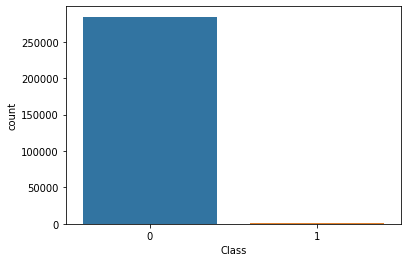

In [10]:
sns.countplot(data['Class'])

In [12]:
noFraud = len(data[data.Class == 0.000000])
Fraud = len(data[data.Class == 1.000000])
print("Fair trasactions: {:.2f}%".format((noFraud / (len(data.Class))*100)))
print("Fraud trasactions: {:.2f}%".format((Fraud / (len(data.Class))*100)))

Fair trasactions: 99.83%
Fraud trasactions: 0.17%


In [14]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data, target = 'Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7944
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.999500,0.970700,0.720500,0.960900,0.821200,0.820900
1,Extra Trees Classifier,0.999400,0.924200,0.681900,0.959700,0.796300,0.796000
2,CatBoost Classifier,0.999400,0.963800,0.721000,0.949500,0.818000,0.817700
3,Linear Discriminant Analysis,0.999300,0.969900,0.730500,0.878300,0.795400,0.795100
4,Random Forest Classifier,0.999200,0.898000,0.605700,0.942100,0.731400,0.731100
5,Ada Boost Classifier,0.999200,0.950500,0.605700,0.887800,0.715800,0.715400
6,Logistic Regression,0.998800,0.885500,0.587100,0.703900,0.633600,0.633000
7,Decision Tree Classifier,0.998800,0.831400,0.663300,0.696600,0.669300,0.668700
8,Gradient Boosting Classifier,0.998800,0.812900,0.575200,0.687400,0.622400,0.621800
9,Ridge Classifier,0.998700,0.000000,0.327600,0.835000,0.464900,0.464300


In [16]:
# creating logistic regression model
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9993,0.9895,0.6000,1.0000,0.7500,0.7497
1,0.9995,0.9965,0.8000,0.8889,0.8421,0.8419
2,0.9997,0.9792,0.8000,1.0000,0.8889,0.8887
3,0.9993,0.9702,0.7000,0.8750,0.7778,0.7774
4,0.9990,0.9372,0.6000,0.7500,0.6667,0.6662
5,0.9998,0.9996,0.9091,1.0000,0.9524,0.9523
6,0.9995,0.9661,0.8182,0.9000,0.8571,0.8569
7,0.9995,0.9582,0.7273,1.0000,0.8421,0.8419
8,0.9992,0.9928,0.5455,1.0000,0.7059,0.7055
9,0.9993,0.9208,0.6000,1.0000,0.7500,0.7497


In [17]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=7944,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [18]:
model=tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9995,0.9894,0.7000,1.0000,0.8235,0.8233
1,0.9997,0.9999,0.8000,1.0000,0.8889,0.8887
2,0.9995,0.9680,0.7000,1.0000,0.8235,0.8233
3,0.9993,0.9068,0.6000,1.0000,0.7500,0.7497
4,0.9993,0.8987,0.6000,1.0000,0.7500,0.7497
5,0.9998,0.9997,0.9091,1.0000,0.9524,0.9523
6,0.9995,0.9880,0.8182,0.9000,0.8571,0.8569
7,0.9997,0.9182,0.8182,1.0000,0.9000,0.8998
8,0.9992,0.9980,0.6364,0.8750,0.7368,0.7364
9,0.9995,0.8652,0.7000,1.0000,0.8235,0.8233
